<a href="https://colab.research.google.com/github/WellingtonMartinsSantos/MODELO-MACHINE-LEARNING-DE-UM-TROCADOR-DE-CALOR-TIPO-PLACA-VIA-MODELO-GERADO-NO-ASPEN_TCC/blob/main/MODELO_MACHINE_LEARNING_DE_UM_TROCADOR_DE_CALOR_TIPO_PLACA_VIA_MODELO_GERADO_NO_ASPEN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Bibliotecas Base
import pandas as pd 
import numpy as  np 
import seaborn as sns 
import matplotlib.pyplot as plt

#Modelos de busca por melhores parâmetros de modelos

from time import time#contagem de tempo para execução de tarefas


In [2]:
fonte = pd.read_csv('https://raw.githubusercontent.com/WellingtonMartinsSantos/MODELO-MACHINE-LEARNING-DE-UM-TROCADOR-DE-CALOR-TIPO-PLACA-VIA-MODELO-GERADO-NO-ASPEN_TCC/main/MODELO%20MACHINE%20LEARNING%20DE%20UM%20TROCADOR%20DE%20CALOR%20TIPO%20PLACA%20VIA%20MODELO%20GERADO%20NO%20ASPEN.csv',encoding='ISO-8859-1') #Importando os dados gerados no Aspen HYSYS

dados = fonte #Renomeando as informações para dados

dados=dados.drop(labels=0) # Excluido a primeira linha dos dados, pois não interessa.

dadosX = dados.drop(['State','1 - Etanol Out - Mass Flow','2 - Etanol Out - Mass Flow',
                     '2º Trocador de placa - Heat Transfer Coefficient','1 - Etanol Out - Temperature',
                       '1º Trocador de placa - Heat Transfer Coefficient',
                       '2 - Etanol Out - Temperature',
                       '1 - Cerveja In - Mass Heat Capacity',
                       'Cerveja Out - Mass Heat Capacity',
                       '1 - Etanol In - Mass Heat Capacity',
                       '1 - Etanol Out - Mass Heat Capacity','2 - Etanol In - Mass Heat Capacity',
                     '2 - Etanol Out - Mass Heat Capacity','2 - Cerveja Out - Mass Heat Capacity'],
                    axis = 1) # Retirando as features target e features sem qualquer relação com o calculo.



dados_y1=dados # Transformando os dados em resposta do primeiro trocador.
dados_y2=dados # Transformando os dados em resposta do segundo trocador.

# Transformando os dados target em float: 1.° e 2.° Trocador de calor.
dados_y1['1 - Etanol Out - Mass Flow']=dados_y1['1 - Etanol Out - Mass Flow'].astype('float') 
dados_y2['2 - Etanol Out - Mass Flow']=dados_y2['2 - Etanol Out - Mass Flow'].astype('float')

# Guando as informações da feature target para treino.
dados_y1 = dados_y1['1 - Etanol Out - Mass Flow']
dados_y2 = dados_y2['2 - Etanol Out - Mass Flow']

# Transformando as variavel do Coeficiente global de transferência de calor em float de cada um dos trocadores de calor.
dados_U= dados
dados_U['1º Trocador de placa - Heat Transfer Coefficient']=dados_U['1º Trocador de placa - Heat Transfer Coefficient'].astype('float')
dados_U['2º Trocador de placa - Heat Transfer Coefficient']=dados_U['2º Trocador de placa - Heat Transfer Coefficient'].astype('float')
dados_U['1 - Etanol Out - Temperature']=dados_U['1 - Etanol Out - Temperature'].astype('float')
dados_U['2 - Etanol Out - Temperature']=dados_U['2 - Etanol Out - Temperature'].astype('float')
dados_U['1 - Cerveja In - Mass Heat Capacity']=dados_U['1 - Cerveja In - Mass Heat Capacity'].astype('float')
dados_U['Cerveja Out - Mass Heat Capacity']=dados_U['Cerveja Out - Mass Heat Capacity'].astype('float')
dados_U['1 - Etanol In - Mass Heat Capacity']=dados_U['1 - Etanol In - Mass Heat Capacity'].astype('float')
dados_U['1 - Etanol Out - Mass Heat Capacity']=dados_U['1 - Etanol Out - Mass Heat Capacity'].astype('float')
dados_U['2 - Etanol In - Mass Heat Capacity']=dados_U['2 - Etanol In - Mass Heat Capacity'].astype('float')
dados_U['2 - Etanol Out - Mass Heat Capacity']=dados_U['2 - Etanol Out - Mass Heat Capacity'].astype('float')
dados_U['2 - Cerveja Out - Mass Heat Capacity']=dados_U['2 - Cerveja Out - Mass Heat Capacity'].astype('float')


# Selecionando as váriveis principais para analise do coeficiente global de transferência de calor. 
dados_U = dados_U[['State','1 - Cerveja In - Mass Flow','1 - Cerveja In - Temperature',
                   '1 - Cerveja In - Pressure','1 - Etanol In - Pressure','1 - Etanol In - Temperature',
                   '2 - Etanol In - Pressure','2 - Etanol In - Temperature',
                   '1º Trocador de placa - Heat Transfer Coefficient',
                   '2º Trocador de placa - Heat Transfer Coefficient',
                   '1 - Etanol Out - Temperature',
                   '2 - Etanol Out - Temperature',
                   '1 - Cerveja In - Mass Heat Capacity',
                   'Cerveja Out - Mass Heat Capacity',
                   '1 - Etanol In - Mass Heat Capacity',
                   '1 - Etanol Out - Mass Heat Capacity','2 - Etanol In - Mass Heat Capacity',
                   '2 - Etanol Out - Mass Heat Capacity','2 - Cerveja Out - Mass Heat Capacity',
                   '1 - Etanol Out - Mass Flow','2 - Etanol Out - Mass Flow']]

# Transformando os dados da análise do U em float: 1.° e 2.° Trocador de calor.
dados_U['1 - Cerveja In - Mass Flow'] = dados_U['1 - Cerveja In - Mass Flow'].astype('float')
dados_U['1 - Etanol Out - Mass Flow'] = dados_U['1 - Etanol Out - Mass Flow'].astype('float')
dados_U['2 - Etanol Out - Mass Flow'] = dados_U['2 - Etanol Out - Mass Flow'].astype('float')
dados_U['1 - Cerveja In - Temperature'] = dados_U['1 - Cerveja In - Temperature'].astype('float')
dados_U['1 - Cerveja In - Pressure'] = dados_U['1 - Cerveja In - Pressure'].astype('float')
dados_U['1 - Etanol In - Pressure'] = dados_U['1 - Etanol In - Pressure'].astype('float')
dados_U['1 - Etanol In - Temperature'] = dados_U['1 - Etanol In - Temperature'].astype('float')
dados_U['2 - Etanol In - Temperature'] = dados_U['2 - Etanol In - Temperature'].astype('float')
dados_U['2 - Etanol In - Pressure'] = dados_U['2 - Etanol In - Pressure'].astype('float')


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Verificando a quantidade de linha e colunas da variável dadosX:
dadosX.shape

(90720, 7)

In [ ]:
# Fazendo leitura das informações dos dadosX
dadosX.head()

,1 - Cerveja In - Mass Flow,1 - Cerveja In - Temperature,1 - Cerveja In - Pressure,1 - Etanol In - Pressure,1 - Etanol In - Temperature,2 - Etanol In - Temperature,2 - Etanol In - Pressure
1,8.838,14.67,2.997,2.664,2.808,-2.816,4.401
2,8.838,14.67,2.997,2.664,2.808,-2.816,4.901
3,8.838,14.67,2.997,2.664,2.808,-2.616,4.401
4,8.838,14.67,2.997,2.664,2.808,-2.616,4.901
5,8.838,14.67,2.997,2.664,2.808,-2.416,4.401


In [ ]:
# Averiguando o tipo ou falta de informações das váriveis das variveis dadoX:

print("Valores do Conjunto:\n")
print(dadosX.info())

Valores do Conjunto:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90720 entries, 1 to 90720
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   1 - Cerveja In - Mass Flow    90720 non-null  object
 1   1 - Cerveja In - Temperature  90720 non-null  object
 2   1 - Cerveja In - Pressure     90720 non-null  object
 3   1 - Etanol In - Pressure      90720 non-null  object
 4   1 - Etanol In - Temperature   90720 non-null  object
 5   2 - Etanol In - Temperature   90720 non-null  object
 6   2 - Etanol In - Pressure      90720 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB
None


In [ ]:
# Transformando as variáveis de entrada em float do 1.° e 2.° Trocador de calor.

dadosX['1 - Cerveja In - Mass Flow'] = dadosX['1 - Cerveja In - Mass Flow'].astype('float')
dadosX['1 - Cerveja In - Temperature'] = dadosX['1 - Cerveja In - Temperature'].astype('float')
dadosX['1 - Cerveja In - Pressure'] = dadosX['1 - Cerveja In - Pressure'].astype('float')
dadosX['1 - Etanol In - Pressure'] = dadosX['1 - Etanol In - Pressure'].astype('float')
dadosX['1 - Etanol In - Temperature'] = dadosX['1 - Etanol In - Temperature'].astype('float')
dadosX['2 - Etanol In - Temperature'] = dadosX['2 - Etanol In - Temperature'].astype('float')
dadosX['2 - Etanol In - Pressure'] = dadosX['2 - Etanol In - Pressure'].astype('float')

# Verificando os tipos das variveis novamente:

dadosX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90720 entries, 1 to 90720
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   1 - Cerveja In - Mass Flow    90720 non-null  float64
 1   1 - Cerveja In - Temperature  90720 non-null  float64
 2   1 - Cerveja In - Pressure     90720 non-null  float64
 3   1 - Etanol In - Pressure      90720 non-null  float64
 4   1 - Etanol In - Temperature   90720 non-null  float64
 5   2 - Etanol In - Temperature   90720 non-null  float64
 6   2 - Etanol In - Pressure      90720 non-null  float64
dtypes: float64(7)
memory usage: 5.5 MB


In [ ]:
# Importando da biblioteca o train_test_split para separar os dados em treino e teste.
 
from sklearn.model_selection import train_test_split

# No qual separou-se 33% para teste e 67% para treino:

X_train, X_test, y_train, y_test = train_test_split( dadosX, dados_y1, test_size=0.33, random_state=42)

In [ ]:
# Verificando a quantidade de linha e colunas das variáveis treino:

X_train.shape, y_train.shape

((60782, 7), (60782,))

In [ ]:
# Verificando a quantidade de linha e colunas das variáveis teste:

X_test.shape,y_test.shape

((29938, 7), (29938,))

Modelo: LinearRegression |Valores do Score: [0.83521431 0.83613327 0.83578039 0.83036244]| Valores dos coeficientes: [ 9.91527377  3.93996274  0.21689945  0.0324071  18.02982764 -0.0338367
 -0.02667047] | Intercept: -193.71071036376105 | Média: 0.8343726043279123 | Desvio: 0.0023383573004877914 | Mean squared error (MSE): 12.845974339548986 
Training set score: 0.8344017416118438
Test set score: 0.834514902258946
Legend

Tempo do modelo de regressão linear: 0.35981011390686035 seg
Modelo: MLPRegressor |Valores do Score: [0.85267436 0.87052364 0.86563706 0.93041956] | Média: 0.8798136578871353 | Desvio: 0.029936512950207057 | Mean squared error (MSE): 10.264453696833034
Training set score: 0.8680741120108157
Test set score: 0.8677707055626444
Legend

Tempo do modelo MLPRegessor: 375.51687026023865 seg
Modelo: DecisionTreeRegressor |Valores do Score: [0.99999981 0.99999985 0.99999969 0.99999988]| Valores dos coeficientes: [4.58842670e-01 2.85670038e-01 3.40528533e-05 6.33149111e-06
 2.55

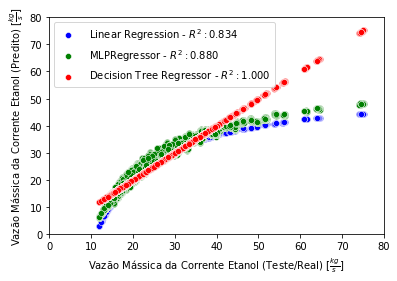

In [ ]:
# ignorando warnings da MLP

import warnings
warnings.filterwarnings("ignore")

# Importando os modelos de Regressão Linear, Perceptron Múltiplas Camadas e Árvore de Decisão. 

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

# Importando os cálculos para fazer validação cruzada.

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Definindo o número de divisões da validação cruzada.

kfold = KFold(n_splits=4, shuffle=True, random_state=42)

# Importanto o Erro Quadratico médio

from sklearn.metrics import mean_squared_error

# conjunto de modelos
models = [LinearRegression(), MLPRegressor(),DecisionTreeRegressor()]

# Lista dos nomes das variáveis importantes.

nome_features = []

# Lista dos valores das variáveis importantes.
import time
features = []

for model in models: # Aplicando em cada modelo as regras.
    inicio = time.time()
    val_scores = cross_val_score(model,X_train, y_train, cv=kfold) # Aplicando ao modelo uma validação cruzada nos dados de treino. 
    nome_modelo = type(model).__name__ # somente para exibição.
    model.fit(X_train, y_train) # Ajustando o modelo de treino. 
    Y_pred = model.predict(X_test) # Predizendo a variável target utilizando o dado de teste.
    
    if models[0]==model: # Se o modelo é de regressão linear aplica-se essas regras.
      print('Modelo: {} |Valores do Score: {}| Valores dos coeficientes: {} | Intercept: {} | Média: {} | Desvio: {} | Mean squared error (MSE): {} '.format(nome_modelo,
              val_scores,model.coef_,model.intercept_,np.mean(val_scores), np.std(val_scores),mean_squared_error(y_test,Y_pred)))
      
      print("Training set score: {}".format(model.score(X_train, y_train))) # Coeficiente de determinação do treino.
      print("Test set score: {}".format(model.score(X_test, y_test))) # Coeficiente de determinação do test.
      media_scores1=np.mean(val_scores) # Média do coeficiente de determinação dos valores da validação cruzada. 
      print(sns.scatterplot(y_test,Y_pred,color='blue',
                            marker='o',legend='full',alpha=1,
                            label= r" Linear Regression - $R^2: {:.3f}$".format(media_scores1)).legend(loc="best"))
                            # Plotando o modelo Regressão Linear.
      fim = time.time()
      tempoRL= fim-inicio
      print('\nTempo do modelo de regressão linear: {} seg'.format(tempoRL))

    if models[1]==model: # Se o modelo é de Perceptron Múltiplas Camadas aplica-se essas regras.
      print('Modelo: {} |Valores do Score: {} | Média: {} | Desvio: {} | Mean squared error (MSE): {}'.format(nome_modelo,val_scores,
                                   np.mean(val_scores), np.std(val_scores),mean_squared_error(y_test,Y_pred)))
      print("Training set score: {}".format(model.score(X_train, y_train))) # Coeficiente de determinação do treino.
      print("Test set score: {}".format(model.score(X_test, y_test))) # Coeficiente de determinação do test.
      media_scores2=np.mean(val_scores) # Média do coeficiente de determinação dos valores da validação cruzada.
      print(sns.scatterplot(y_test,Y_pred,color='green',
                            marker='o',legend='full',alpha=1,
                            label= r" MLPRegressor - $R^2: {:.3f}$".format(media_scores2)).legend(loc="best"))
                            # Plotando o modelo MLPRegressor.
      fim = time.time()
      tempoMLP= fim-inicio
      print('\nTempo do modelo MLPRegessor: {} seg'.format(tempoMLP))

    if models[2]==model: # Se o modelo é de Árvore de Decisão aplica-se essas regras.
      print('Modelo: {} |Valores do Score: {}| Valores dos coeficientes: {} | Média: {} | Desvio: {} | Mean squared error (MSE): {} '.format(nome_modelo,val_scores,model.feature_importances_,
                                   np.mean(val_scores), np.std(val_scores),mean_squared_error(y_test,Y_pred)))
      print("Training set score: {}".format(model.score(X_train, y_train))) # Coeficiente de determinação do treino.
      print("Test set score: {}".format(model.score(X_test, y_test))) # Coeficiente de determinação do test.
      
      for importance, name in sorted(zip(model.feature_importances_, X_train.columns),reverse=True):
        print (name, importance) # Printando o nome e valores das variáveis importantes.
        nome_features.append(name) # Guardando na lista dos nomes das variáveis importantes.
        features.append(importance) # Guardando na lista dos valores das variáveis importantes.
      media_scores3=np.mean(val_scores) # Média do coeficiente de determinação dos valores da validação cruzada.
      print(sns.scatterplot(y_test,Y_pred,color='red',
                            marker='o',legend='full',alpha=1,
                            label= r" Decision Tree Regressor - $R^2: {:.3f}$".format(media_scores3)).legend(loc="best"))
                            # Plotando o modelo árvore de decisão.
      fim = time.time()
      tempoDTR= fim-inicio
      print('\nTempo do modelo da arvore de decisão: {} seg'.format(tempoDTR))

#plt.ylim([77,max(dados_Ue['1 - EficiênciaQuente']+1)])
plt.ylim([0,80])
plt.xlim([0,80])
plt.xlabel(r'Vazão Mássica da Corrente Etanol (Teste/Real) $[\frac{kg}{s}]$') # Nome do eixo abscissa (x).
plt.ylabel(r'Vazão Mássica da Corrente Etanol (Predito) $[\frac{kg}{s}]$') # Nome do eixo ordenada (y).
plt.savefig('1- Etanol Out - Mass Flow.pdf', 
           transparent=True) # Salvando a figura em pdf.

In [ ]:
# Transformando os valores das variáveis de grau de importancia do modelo árvore de decisão em float.

variaveis=[]
for i in list(features):
  v = float('{:.2f}'.format(i*100))
  variaveis.append(v)
variaveis

[45.88, 28.57, 25.54, 0.0, 0.0, 0.0, 0.0]

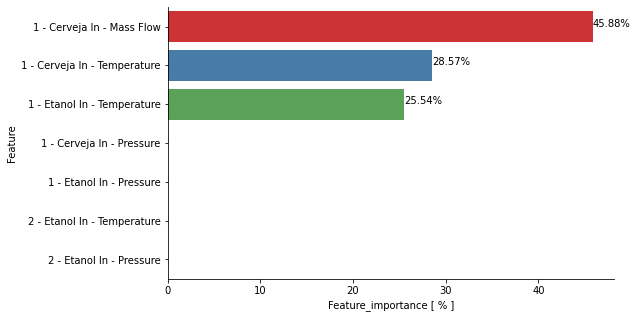

<Figure size 432x288 with 0 Axes>

In [ ]:
# Platando o gráfico das variveis importante

fake = pd.DataFrame({'f': variaveis,'g': nome_features})  # Transformando os dados em DataFrame.
plt.figure(figsize=(8,5)) # Definindo o tamanho da figura.
fig = sns.barplot(x = 'f', y = 'g',data=fake,palette="Set1") # Inserindo os dados do gráfico em barra.
for py,px in enumerate(variaveis): # Colocando o rótulo no gráfico.
  if px!=0:
    fig.annotate(str(px)+'%',xy=(px,py))
fig.spines['top'].set_visible(False) # Retirando a linha superior da figura.
fig.spines['right'].set_visible(False) # Retirando a linha à direita da figura.
plt.xlabel("Feature_importance [ % ]") # Nome do eixo abscissa (x).
plt.ylabel("Feature") # Nome do eixo ordenada (y).

plt.show(fig)
plt.savefig('1 - Feature_importance.pdf', 
           transparent=True) # Salvando a figura em pdf.

In [ ]:
# Calculando o cdpMédio do lado quente e do lado frio, para cada um dos trocadores.
dados_U['1 - CpmedioQuente'] = (dados_U['1 - Cerveja In - Mass Heat Capacity']+dados_U['Cerveja Out - Mass Heat Capacity'])/2
dados_U['1 - CpmedioFrio'] = (dados_U['1 - Etanol In - Mass Heat Capacity']+dados_U['1 - Etanol Out - Mass Heat Capacity'])/2
dados_U['2 - CpmedioQuente'] = (dados_U['Cerveja Out - Mass Heat Capacity']+dados_U['2 - Cerveja Out - Mass Heat Capacity'])/2
dados_U['2 - CpmedioFrio'] = (dados_U['2 - Etanol In - Mass Heat Capacity']+dados_U['2 - Etanol Out - Mass Heat Capacity'])/2
dados_U[['1 - CpmedioQuente','1 - CpmedioFrio','2 - CpmedioQuente','2 - CpmedioFrio']]

,1 - CpmedioQuente,1 - CpmedioFrio,2 - CpmedioQuente,2 - CpmedioFrio
1,4.106,3.9105,4.1035,3.9250
2,4.106,3.9105,4.1035,3.9250
3,4.106,3.9105,4.1035,3.9270
4,4.106,3.9105,4.1035,3.9270
5,4.106,3.9105,4.1035,3.9295
...,...,...,...,...
90716,4.114,3.8955,4.1035,3.9405
90717,4.114,3.8955,4.1035,3.9400
90718,4.114,3.8955,4.1035,3.9400
90719,4.114,3.8955,4.1035,3.9405


In [ ]:
# Predizendo a corrente Etanol a partir do modelo árvore de decisão, no primeiro trocador de calor.
dados_U['1 - Etanol Out - Mass Flow'] = model.predict(dadosX)

In [ ]:
# Calculando do produto minimo da vazão mássica e capacidade calorifica, no primeiro trocador de calor. 
dados_U['1 - m.CpmedioQuente']=dados_U['1 - CpmedioQuente']*dados_U['1 - Cerveja In - Mass Flow']
dados_U['1 - m.CpmedioFrio']=dados_U['1 - CpmedioFrio']*dados_U['1 - Etanol Out - Mass Flow']
dados_U[['1 - m.CpmedioQuente','1 - m.CpmedioFrio']]

,1 - m.CpmedioQuente,1 - m.CpmedioFrio
1,36.288828,46.652265
2,36.288828,46.652265
3,36.288828,46.652265
4,36.288828,46.652265
5,36.288828,46.652265
...,...,...
90716,43.772960,293.058465
90717,43.772960,293.058465
90718,43.772960,293.058465
90719,43.772960,293.058465


In [ ]:
# Calculando a taxa de calor trocada (Q) para o primeiro trocador de calor, no lado quente e frio.
dados_U['1 - Qquente']=dados_U['1 - m.CpmedioQuente']*(dados_U['1 - Cerveja In - Temperature']-5.47)
dados_U['1 - Qfrio']=dados_U['1 - m.CpmedioFrio']*(dados_U['1 - Etanol Out - Temperature']-dados_U['1 - Etanol In - Temperature'])
dados_U[['1 - Qquente','1 - Qfrio']]

,1 - Qquente,1 - Qfrio
1,333.857218,335.476438
2,333.857218,335.476438
3,333.857218,335.476438
4,333.857218,335.476438
5,333.857218,335.476438
...,...,...
90716,542.784704,553.001323
90717,542.784704,553.001323
90718,542.784704,553.001323
90719,542.784704,553.001323


In [ ]:
# calculo o delta máximo da temperatura entre as correntes(Tq,e-Tf,e). Para ambos os trocadores. 
dados_U['1 - deltaTmax']=dados_U['1 - Cerveja In - Temperature']-dados_U['1 - Etanol In - Temperature']
dados_U['2 - deltaTmax']=5.47-dados_U['2 - Etanol In - Temperature']
dados_U[['1 - deltaTmax','2 - deltaTmax']]

,1 - deltaTmax,2 - deltaTmax
1,11.862,8.286
2,11.862,8.286
3,11.862,8.086
4,11.862,8.086
5,11.862,7.886
...,...,...
90716,14.462,8.286
90717,14.462,8.086
90718,14.462,8.086
90719,14.462,7.886


In [ ]:
# Calculando a taxa máxima de calor de troca (Qmáx) 
dados_U['1 - dadosQmaxquente'] = dados_U['1 - m.CpmedioQuente']*dados_U['1 - deltaTmax']
# Calculando a Eficiência(%) do primeiro trocador de calor: E = Q / Qmáx 
dados_U['1 - EficiênciaQuente'] = 100*dados_U['1 - Qquente']/dados_U['1 - dadosQmaxquente']
dados_U['1 - EficiênciaQuente']   

1        77.558590
2        77.558590
3        77.558590
4        77.558590
5        77.558590
           ...    
90716    85.741944
90717    85.741944
90718    85.741944
90719    85.741944
90720    85.741944
Name: 1 - EficiênciaQuente, Length: 90720, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


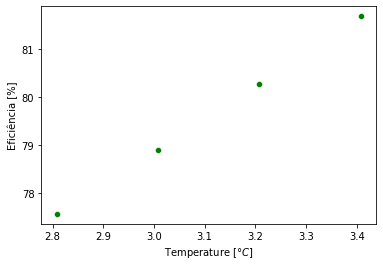

In [ ]:
# A eficiência com a variação da temperatura do etanol na entrada. 
dados_Ue=dados_U.drop_duplicates(subset=['1 - Etanol In - Temperature']) # Retirando linhas duplicadas da temperatura de etanol. 
print(sns.scatterplot('1 - Etanol In - Temperature','1 - EficiênciaQuente',data=dados_Ue,
                      color='green',marker='o',legend='full',alpha=1))
#plt.ylim([77,max(dados_Ue['1 - EficiênciaQuente']+1)])
plt.xlabel(r'Temperature $[°C]$') # Nome do eixo abscissa (x).
plt.ylabel(r'Eficiência [%]') # Nome do eixo ordenada (y).
plt.savefig('1 - Etanol In - Temperature EFIC.pdf', 
           transparent=True) # Salvando a figura em pdf.

AxesSubplot(0.125,0.125;0.775x0.755)


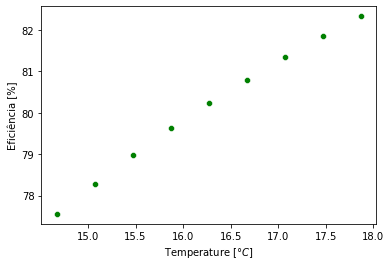

In [ ]:
# A eficiência com a variação da temperatura da cerveja na entrada. 
dados_Ue1=dados_U.drop_duplicates(subset=['1 - Cerveja In - Temperature']) # Retirando linhas duplicadas da temperatura da cerveja. 
print(sns.scatterplot('1 - Cerveja In - Temperature','1 - EficiênciaQuente',data=dados_Ue1,
                      color='green',marker='o',legend='full',alpha=1))
#plt.ylim([0,90])
plt.xlabel(r'Temperature $[°C]$') # Nome do eixo abscissa (x).
plt.ylabel(r'Eficiência [%]') # Nome do eixo ordenada (y).
plt.savefig('1 - Cerveja In - Temperature EFIC.pdf', 
           transparent=True) # Salvando a figura em pdf.

AxesSubplot(0.125,0.125;0.775x0.755)


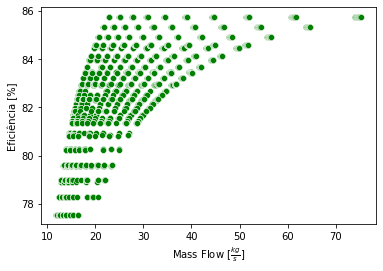

In [ ]:
# A eficiência com a variação da vazão mássica do etanol na saída. 
dados_Ue2=dados_U.drop_duplicates(subset=['1 - Etanol Out - Mass Flow']) # Retirando linhas duplicadas da vazão mássica do etanol na saída. 
print(sns.scatterplot('1 - Etanol Out - Mass Flow','1 - EficiênciaQuente',data=dados_Ue2,
                      color='green',marker='o',legend='full',alpha=1))
plt.xlabel(r'Mass Flow $[\frac{kg}{s}]$') # Nome do eixo abscissa (x).
plt.ylabel(r'Eficiência [%]') # Nome do eixo ordenada (y).
plt.savefig('1 - Etanol Out - Mass Flow EFIC.pdf', 
           transparent=True) # Salvando a figura em pdf.

In [ ]:
# Melhores valores da vazão mássica de etanol no primeiro trocador de calor combinada com a eficiência.
p=0
mass=[]
efi =[]
for j,k in enumerate(dados_U['1 - EficiênciaQuente']):
  if k>p:
    p=k
    b=dados_Ue2['1 - Etanol Out - Mass Flow'][1+j]
    mass.append(b)
    efi.append(k)
    print(b,k,1+j)

11.930000000000003 77.55859045692125 1
12.83 78.88869833647745 7
13.960000000000006 80.26522421915895 13
15.4 81.69064109394422 19
16.17 82.31864174241126 1027
16.98 82.904990880451 2035
17.82 83.45369924570694 3043
18.73 83.96827865028767 4051
19.65 84.45181722213844 5059
20.65 84.90704142878057 6067
21.7 85.33636751528944 7075
22.82 85.7419444060296 8083
34.28 85.74194440602962 44371


AxesSubplot(0.125,0.125;0.775x0.755)


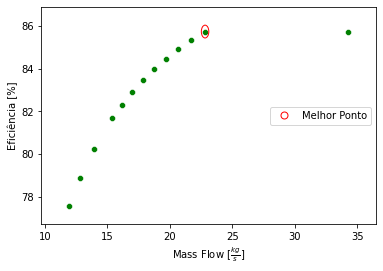

In [ ]:
# Plotando o gráfico de melhor eficiencia combinado com a vazão mássica de etanol.
from matplotlib.patches import Circle
from matplotlib.lines import Line2D
print(sns.scatterplot(x=mass,y=efi,
                      color='green',marker='o',legend='full',alpha=1))
plt.xlabel(r'Mass Flow $[\frac{kg}{s}]$') # Nome do eixo abscissa (x).
plt.ylabel(r'Eficiência [%]') # Nome do eixo ordenada (y).
plt.gca().margins(0.1)

cir = Circle((22.82, 85.7419444060296),0.3,color='red',lw=1,fill=False,zorder=10)
red_circle = Line2D([], [], marker='o', color='r',
                        markerfacecolor='w',lw=0, markersize=7),

plt.gca().add_patch(cir)
plt.legend([red_circle],[r'Melhor Ponto'],loc='right')
plt.savefig('1 - Etanol Out - Mass Flow EFIC.pdf', 
           transparent=True) # Salvando a figura em pdf.

In [ ]:
# Descrição das correntes no melhor ponto de eficiência, no primeiro trocador de calor.
dados_Ue2[['1 - Cerveja In - Mass Flow','1 - Cerveja In - Temperature','1 - Cerveja In - Pressure','1 - Etanol In - Temperature',
           '1 - Etanol In - Pressure','1º Trocador de placa - Heat Transfer Coefficient',
           '1 - Etanol Out - Temperature','1 - Etanol Out - Mass Flow','1 - EficiênciaQuente']].loc[8083:8083]

,1 - Cerveja In - Mass Flow,1 - Cerveja In - Temperature,1 - Cerveja In - Pressure,1 - Etanol In - Temperature,1 - Etanol In - Pressure,1º Trocador de placa - Heat Transfer Coefficient,1 - Etanol Out - Temperature,1 - Etanol Out - Mass Flow,1 - EficiênciaQuente
8083,8.838,17.87,2.997,3.408,2.664,3216.0,8.5,22.82,85.741944


In [ ]:
# Separando os dados em treino e teste, no qual separou-se 33% para teste e 67% para treino:

x_train, x_test, Y_train, Y_test = train_test_split( dadosX, dados_y2, test_size=0.33, random_state=42)

Modelo: LinearRegression |Valores do Score: [0.88893077 0.88865784 0.88906141 0.88722446]|Valores dos coeficientes: [ 1.04785574e+01  5.34824705e-03 -4.07704934e-02 -2.42597825e-04
 -2.91910505e-02  2.56629902e+01  1.31929699e-01] |Intercept: -12.451805322833767 | Média: 0.888468620383359 | Desvio: 0.000732925391591719 | Mean squared error (MSE): 6.718769956029299 
Training set score: 0.888503696109894
Test set score: 0.8873080750214497
Legend

Tempo do modelo de regressão linear: 0.19715571403503418 seg
Modelo: MLPRegressor |Valores do Score: [0.88832074 0.99934543 0.99967151 0.99973005] | Média: 0.971766932799786 | Desvio: 0.048177905362899044 | Mean squared error (MSE): 0.24162999093558682 
Training set score: 0.9960669135442269
Test set score: 0.9959472122145445
Legend

Tempo do modelo MLPRegessor: 370.60986709594727 seg
Modelo: DecisionTreeRegressor |Valores do Score: [1. 1. 1. 1.]|Valores dos coeficientes: [6.46022038e-01 2.09967072e-13 9.42668592e-14 1.11120555e-13
 8.97204730e-

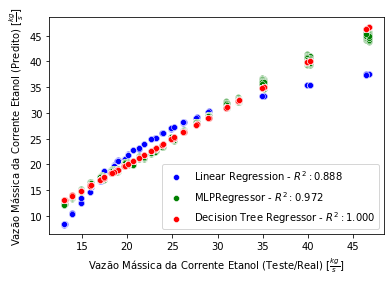

In [ ]:
# conjunto de modelos

models1 = [LinearRegression(), MLPRegressor(),DecisionTreeRegressor()]
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

# Lista dos nomes das variáveis importantes.

nome_features2 = []

# Lista dos valores das variáveis importantes.

features2 = []


for model2 in models1: # Aplicando em cada modelo as regras.
    inicio = time.time()
    val_scores = cross_val_score(model2,x_train, Y_train, cv=kfold) # Aplicando ao modelo uma validação cruzada nos dados de treino.
    nome_modelo = type(model2).__name__ # Somente para exibição.
    model2.fit(x_train, Y_train) # Ajustando o modelo de treino.
    y_pred = model2.predict(x_test) # Predizendo a variável target utilizando o dado de teste.

    if models1[0]==model2: # Se o modelo é de regressão linear aplica-se essas regras.
      print('Modelo: {} |Valores do Score: {}|Valores dos coeficientes: {} |Intercept: {} | Média: {} | Desvio: {} | Mean squared error (MSE): {} '.format(nome_modelo,val_scores,model2.coef_,model2.intercept_,
                                   np.mean(val_scores), np.std(val_scores),mean_squared_error(Y_test,y_pred)))
      print("Training set score: {}".format(model2.score(x_train, Y_train))) # Coeficiente de determinação do treino.
      print("Test set score: {}".format(model2.score(x_test, Y_test))) # Coeficiente de determinação do test.
      media_scores4=np.mean(val_scores) # Média do coeficiente de determinação dos valores da validação cruzada.
      print(sns.scatterplot(Y_test,y_pred,color='blue',
                            marker='o',legend='full',alpha=1,
                            label= r"Linear Regression - $R^2: {:.3f}$".format(media_scores4)).legend(loc="best"))
                            # Plotando o modelo Regressão Linear.
      fim = time.time()
      tempoRL= fim-inicio
      print('\nTempo do modelo de regressão linear: {} seg'.format(tempoRL))

    elif models1[1]==model2: # Se o modelo é de Perceptron Múltiplas Camadas aplica-se essas regras.
      print('Modelo: {} |Valores do Score: {} | Média: {} | Desvio: {} | Mean squared error (MSE): {} '.format(nome_modelo,val_scores,
                                   np.mean(val_scores), np.std(val_scores),mean_squared_error(Y_test,y_pred)))
      print("Training set score: {}".format(model2.score(x_train, Y_train))) # Coeficiente de determinação do treino.
      print("Test set score: {}".format(model2.score(x_test, Y_test)))
      media_scores5=np.mean(val_scores) # Média do coeficiente de determinação dos valores da validação cruzada.
      print(sns.scatterplot(Y_test,y_pred,color='green',
                            marker='o',legend='full',alpha=1,
                            label= r"MLPRegressor - $R^2: {:.3f}$".format(media_scores5)).legend(loc="best"))
                            # Plotando o modelo MLPRegressor.
      fim = time.time()
      tempoMLP= fim-inicio
      print('\nTempo do modelo MLPRegessor: {} seg'.format(tempoMLP))

    elif models1[2]==model2: # Se o modelo é de Árvore de Decisão aplica-se essas regras.
      print('Modelo: {} |Valores do Score: {}|Valores dos coeficientes: {} | Média: {} | Desvio: {} | Mean squared error (MSE): {} '.format(nome_modelo,val_scores,model2.feature_importances_,
                                   np.mean(val_scores), np.std(val_scores),mean_squared_error(Y_test,y_pred)))
      print("Training set score: {}".format(model2.score(x_train, Y_train))) # Coeficiente de determinação do treino.
      print("Test set score: {}".format(model2.score(x_test, Y_test))) # Coeficiente de determinação do test.
      for importances, names in sorted(zip(model2.feature_importances_, x_train.columns),reverse=True):
        print (names, importances) # Printando o nome e valores das variáveis importantes.
        nome_features2.append(names) # Guardando na lista dos nomes das variáveis importantes.
        features2.append(importances) # Guardando na lista dos valores das variáveis importantes.
      media_scores6=np.mean(val_scores) # Média do coeficiente de determinação dos valores da validação cruzada.
      print(sns.scatterplot(Y_test,y_pred,color='red',
                            marker='o',legend='full',alpha=1,
                            label= r"Decision Tree Regressor - $R^2: {:.3f}$".format(media_scores6)).legend(loc="best"))
                            # Plotando o modelo Árvore de Decisão.
      fim = time.time()
      tempoDTR= fim-inicio
      print('\nTempo do modelo da arvore de decisão: {} seg'.format(tempoDTR))


plt.xlabel(r'Vazão Mássica da Corrente Etanol (Teste/Real) $[\frac{kg}{s}]$') # Nome do eixo abscissa (x).
plt.ylabel(r'Vazão Mássica da Corrente Etanol (Predito) $[\frac{kg}{s}]$') # Nome do eixo ordenada (y).
plt.savefig('2- Etanol Out - Mass Flow.pdf', 
           transparent=True) # Salvando a figura em pdf.

In [ ]:
# Transformando os valores das variáveis de grau de importancia do modelo árvore de decisão em float.

variaveis1=[]
for i in list(features2):
  v = float('{:.2f}'.format(i*100))
  variaveis1.append(v)
variaveis1

[64.6, 35.39, 0.0, 0.0, 0.0, 0.0, 0.0]

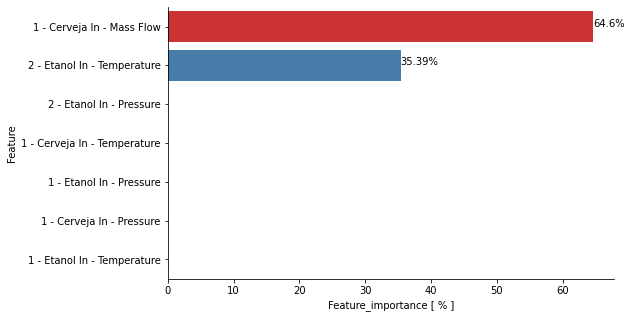

<Figure size 432x288 with 0 Axes>

In [ ]:
# Platando o gráfico das variveis importante

fake2 = pd.DataFrame({'f': variaveis1,'g': nome_features2}) # Transformando os dados em DataFrame. 
plt.figure(figsize=(8,5)) # Definindo o tamanho da figura.
fig = sns.barplot(x = 'f', y = 'g',data=fake2,palette="Set1") # Inserindo os dados do gráfico em barra.
for pY,pX in enumerate(variaveis1): # Colocando o rótulo no gráfico.
  if pX!=0:
    fig.annotate(str(pX)+'%',xy=(pX,pY)) 
fig.spines['top'].set_visible(False) # Retirando a linha superior da figura.
fig.spines['right'].set_visible(False) # Retirando a linha à direita da figura.
plt.xlabel("Feature_importance [ % ]") # Nome do eixo abscissa (x).
plt.ylabel("Feature") # Nome do eixo ordenada (y).

plt.show(fig) # Plotando somente a Figura.
plt.savefig('2 - Feature_importance.png',dpi=300,
           transparent=True) # Salvando a figura em png.


In [ ]:
# Predizendo a corrente Etanol a partir do modelo árvore de decisão, no segundo trocador de calor.
dados_U['2 - Etanol Out - Mass Flow'] = model2.predict(dadosX)

In [ ]:
# Calculando do produto minimo da vazão mássica e capacidade calorifica, no segundo trocador de calor.
dados_U['2 - m.CpmedioQuente']=dados_U['2 - CpmedioQuente']*dados_U['1 - Cerveja In - Mass Flow']
dados_U['2 - m.CpmedioFrio']=dados_U['2 - CpmedioFrio']*dados_U['2 - Etanol Out - Mass Flow']

In [ ]:
#Calculando a taxa de calor trocada (Q) para o segundo trocador de calor, no lado quente e frio.
dados_U['2 - Qquente']=dados_U['2 - m.CpmedioQuente']*(5.47 - (-0.52))
dados_U['2 - Qfrio']=dados_U['2 - m.CpmedioFrio']*(dados_U['2 - Etanol Out - Temperature']-dados_U['2 - Etanol In - Temperature'])

In [ ]:
# Calculando a taxa máxima de calor de troca (Qmáx)
dados_U['2 - dadosQmaxquente'] = dados_U['2 - m.CpmedioQuente']*dados_U['2 - deltaTmax']
# Calculando a Eficiência(%) do segundo trocador de calor: E = Q / Qmáx 
dados_U['2 - EficiênciaQuente'] = 100*dados_U['2 - Qquente']/dados_U['2 - dadosQmaxquente']
dados_U['2 - EficiênciaQuente'] 

1        72.290611
2        72.290611
3        74.078654
4        74.078654
5        75.957393
           ...    
90716    72.290611
90717    74.078654
90718    74.078654
90719    75.957393
90720    75.957393
Name: 2 - EficiênciaQuente, Length: 90720, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


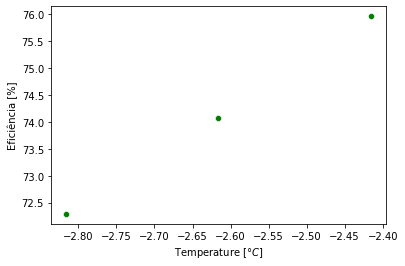

In [ ]:
# A eficiência com a variação da temperatura do etanol na entrada. 
dados_Ue6=dados_U.drop_duplicates(subset=['2 - Etanol In - Temperature']) # Retirando linhas duplicadas da temperatura do etanol. 
print(sns.scatterplot('2 - Etanol In - Temperature','2 - EficiênciaQuente',data=dados_Ue6,
                      color='green',marker='o',legend='full',alpha=1))
plt.xlabel(r'Temperature $[°C]$') # Nome do eixo abscissa (x).
plt.ylabel(r'Eficiência [%]') # Nome do eixo ordenada (y).
plt.savefig('2 - Etanol In - Temperature EFIC.pdf', 
           transparent=True) # Salvando a figura em pdf.

AxesSubplot(0.125,0.125;0.775x0.755)


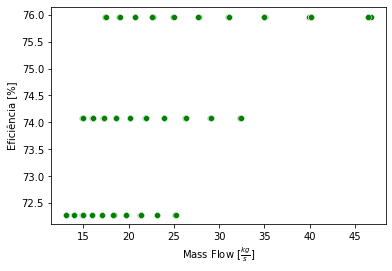

In [ ]:
# A eficiência com a variação da vazão mássica do etanol na saída. 
dados_Ue7=dados_U.drop_duplicates(subset=['2 - Etanol Out - Mass Flow']) # Retirando linhas duplicadas da vazão mássica do etanol na saída. 
print(sns.scatterplot('2 - Etanol Out - Mass Flow','2 - EficiênciaQuente',data=dados_Ue7,
                      color='green',marker='o',legend='full',alpha=1))
plt.xlabel(r'Mass Flow $[\frac{kg}{s}]$') # Nome do eixo abscissa (x).
plt.ylabel(r'Eficiência [%]') # Nome do eixo ordenada (y).
plt.savefig('2 - Etanol Out - Mass Flow EFIC.pdf', 
           transparent=True) # Salvando a figura em pdf.

In [ ]:
# Melhores valores da vazão mássica de etanol no primeiro trocador de calor combinada com a eficiência.
w=0
mass1=[]
efi1 =[]
for r,y in enumerate(dados_U['2 - EficiênciaQuente']):
  if y>w:
    w=y
    b1=dados_Ue7['2 - Etanol Out - Mass Flow'][1+r]
    mass1.append(b1)
    efi1.append(w)
    print(b1,w,1+r)

13.090000000000117 72.29061066859764 1
14.879999999999672 74.07865446450656 3
17.430000000000206 75.95739284808522 5
22.610000000000003 75.95739284808523 27221


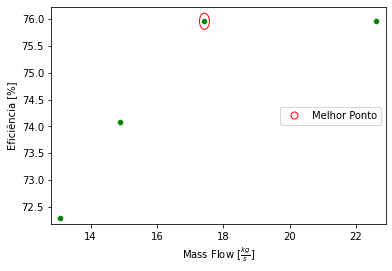

In [ ]:
# Plotando o gráfico de melhor eficiencia combinado com a vazão mássica de etanol.
from matplotlib.patches import Circle
fig= sns.scatterplot(x=mass1,y=efi1,
                      color='green',marker='o',legend='full',alpha=1)
#fig.spines['top'].set_visible(False)
plt.xlabel(r'Mass Flow $[\frac{kg}{s}]$') # Nome do eixo abscissa (x).
plt.ylabel(r'Eficiência [%]') # Nome do eixo ordenada (y).
plt.gca().margins(0.03)

cir1 = Circle((17.430000000000206,75.95739284808522),0.15,color='red',lw=1,fill=False,zorder=10)
red_circle1 = Line2D([], [], marker='o', color='r',label='Circle',
                        markerfacecolor='w',lw=0, markersize=7),

plt.gca().add_patch(cir1)
plt.legend([red_circle1],[r'Melhor Ponto'],loc='right')

plt.savefig('2 - Etanol Out - Mass Flow EFIC.pdf', 
           transparent=True) # Salvando a figura em pdf.

In [ ]:
# Descrição das correntes no melhor ponto de eficiência, no segundo trocador de calor.
dados_Ue7[['1 - Cerveja In - Mass Flow','2 - Etanol In - Temperature','2 - Etanol In - Pressure',
           '2º Trocador de placa - Heat Transfer Coefficient','2 - Etanol Out - Temperature',
           '2 - Etanol Out - Mass Flow','2 - EficiênciaQuente']].loc[5:5]

,1 - Cerveja In - Mass Flow,2 - Etanol In - Temperature,2 - Etanol In - Pressure,2º Trocador de placa - Heat Transfer Coefficient,2 - Etanol Out - Temperature,2 - Etanol Out - Mass Flow,2 - EficiênciaQuente
5,8.838,-2.416,4.401,4378.0,0.7966,17.43,75.957393
